## Linear Regression Multiple Features

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

In [3]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# From this we will not get a normalised data
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## To Normalise this Datasets

In [10]:
# Each features must have 0 mean, unit variance

In [11]:
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
print(u.shape, std.shape)

(13,) (13,)


In [12]:
# Normalising the data

In [13]:
X = (X-u)/std

In [14]:
print(X[:5,:])

[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]


In [15]:
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### Plotting y V/s any single feature

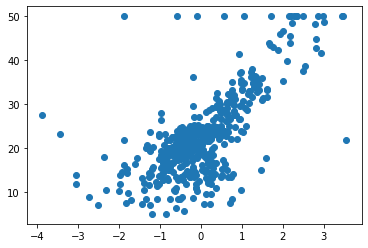

In [16]:
plt.scatter(X[:,5],y)
plt.show()

In [17]:
plt.style.use('seaborn')

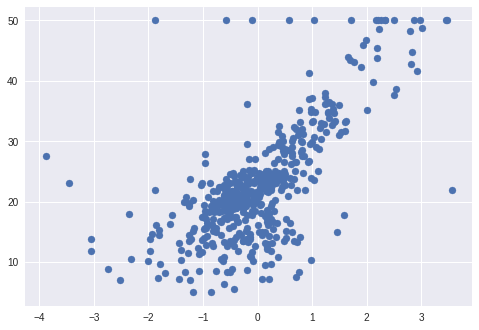

In [18]:
plt.scatter(X[:,5],y)
plt.show()

## Loop Based Implementation for Multiple Features

In [19]:
X.shape, y.shape

((506, 13), (506,))

In [20]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(506, 14)


In [21]:
X[:4,:4]

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 ],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101],
       [ 1.        , -0.41734159, -0.48772236, -0.59338101],
       [ 1.        , -0.41675042, -0.48772236, -1.30687771]])

*   X - represents Matrix

---


*   x - represents Vector (single example with n features)



In [22]:
def hypothesis(x, theta):
  ycap = 0.0
  n = x.shape[0]
  for i in range(n):
    ycap += (theta[i]*x[i])
  return ycap   

In [23]:
def error(X, y, theta):
  e= 0.0
  m = X.shape[0]

  for i in range(m):
    ycap = hypothesis(X[i],theta)
    e += (y[i]-ycap)**2

  return e/m  

In [24]:
def gradient(X, y, theta):
  m, n = X.shape
  grad = np.zeros((n,))
  # for all vales of j that is features

  for j in range(n):
     for i in range(m):
       #Sum over all examples
       ycap = hypothesis(X[i], theta)
       grad[j] += (ycap - y[i])*X[i][j]  
  return grad/m    

In [25]:
def gradient_descent(X, y, learning_rate = 0.1, max_epochs = 300):
  m, n = X.shape
  theta = np.zeros((n,))
  error_list = []
  
  for i in range (max_epochs):
    e = error(X, y, theta)
    error_list.append(e)
    
    #Gradient Descent 
    grad = gradient(X, y, theta)
    for j in range(n):
      theta[j] = theta[j] - learning_rate*grad[j]
  return theta, error_list  


In [26]:
import time
start = time.time()
theta, error_list = gradient_descent(X,y)
end = time.time()
print("Time Taken is ", end-start)
print(theta)

Time Taken is  26.96947979927063
[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


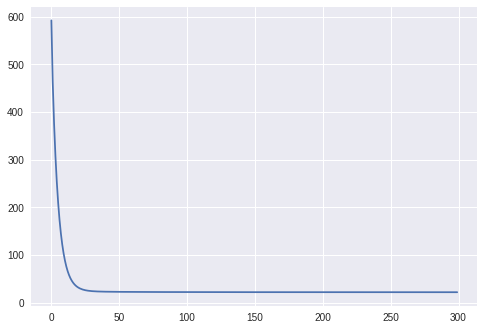

In [27]:
plt.plot(error_list)
plt.show()

### Prediction

In [28]:
ycap = []
m,n = X.shape

In [29]:
for i in range(m):
  pred = hypothesis(X[i], theta)
  ycap.append(pred)
ycap = np.array(ycap)  

In [30]:
def r2_score(y, ycap):
  num = np.sum((y-ycap)**2)
  demon = np.sum((y-y.mean())**2)
  score = (1-num/demon)
  return score*100

In [31]:
# Score of algorithm
r2_score(y, ycap)

74.04541323942743

### Efficient Code Using **Vectorization**

In [41]:
def hypothesisVector(X, theta):
  return np.dot(X,theta)

In [42]:
def errorVector(X, y, theta):
  error = 0.0
  m = X.shape[0]
  ycap = hypothesisVector(X, theta)
  e = np.sum(y-ycap)**2
  return e/m

In [43]:
def gradientVector(X, y, theta):
  ycap = hypothesisVector(X,theta)
  grad = np.dot(X.T, (y-ycap))
  m = X.shape[0]
  return grad/m

In [44]:
def gradient_descentVector(X, y, learning_rate = 0.1, max_iters = 300):
  #m = X.shape[0]
  n = X.shape[1]
  theta = np.zeros((n,))
  error_list =[]
  for i in range(max_iters):
    e = error(X,y,theta)
    error_list.append(e)
    
    # gradient descent
    grad = gradientVector(X, y, theta)
    theta = theta-learning_rate*grad
  return theta, error_list  

In [45]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

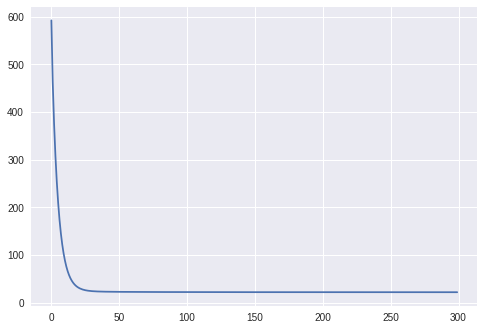

In [46]:
plt.plot(error_list)
plt.show()

In [47]:
import time
start = time.time()
theta, error_list = gradient_descentVector(X,y)
end = time.time()
print("Time Taken in vectorisation is ", end-start)


Time Taken in vectorisation is  1.768960952758789


In [48]:
ycap = hypothesisVector(X, theta)
r2_score(y,ycap)

-1.2672139249016322e+126